In [1]:
print ("jai shree Ganesh")

jai shree Ganesh


Classification of images using the CIFAR-10 Dataset

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.18.0'

# Load Dataset

In [4]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)= cifar10.load_data()

# Sample of the dataset

Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


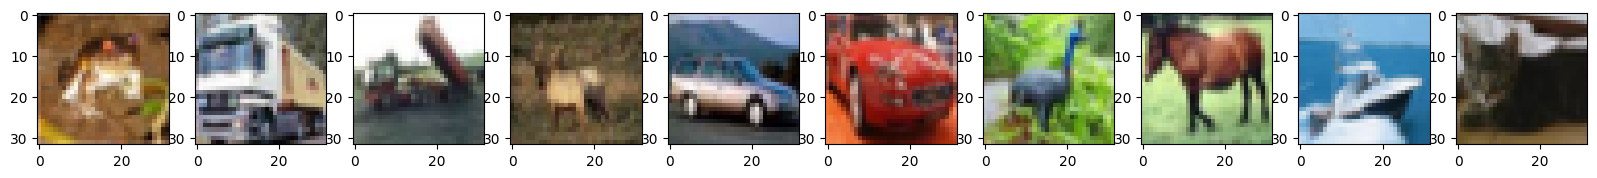

In [5]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [6]:
X_train = x_train / 255.0
X_test = x_test / 255.0

# MLP Network
I/p Layer - Flatten
Hidden layer - 2048, AF = 'RELU'
O/p Layer - 10 , AF-Softmax


In [10]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [11]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

C:\Users\prash\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     6,293,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,313,994 (24.09 MB)

 Trainable params: 6,313,994 (24.09 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# history = ann.fit(X_train ,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.3919 - loss: 1.7041 - val_accuracy: 0.4207 - val_loss: 1.6217
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4259 - loss: 1.6090 - val_accuracy: 0.4300 - val_loss: 1.5921
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.4424 - loss: 1.5674 - val_accuracy: 0.4227 - val_loss: 1.5980
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.4564 - loss: 1.5341 - val_accuracy: 0.4427 - val_loss: 1.5611
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4634 - loss: 1.5021 - val_accuracy: 0.4636 - val_loss: 1.5178


With the below simple function we will be able to plot our training history.

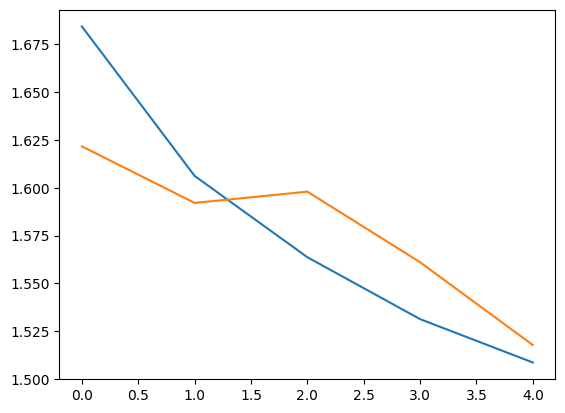

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Now go with the CNN model

In [19]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [20]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

C:\Users\prash\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# cnn.summary()

In [23]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.3071 - loss: 1.8524 - val_accuracy: 0.5797 - val_loss: 1.1843
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5681 - loss: 1.2142 - val_accuracy: 0.6535 - val_loss: 0.9815
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.6630 - loss: 0.9693 - val_accuracy: 0.7022 - val_loss: 0.8806
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7207 - loss: 0.8139 - val_accuracy: 0.7137 - val_loss: 0.8457
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7577 - loss: 0.7087 - val_accuracy: 0.7323 - val_loss: 0.7879
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 27ms/step - accuracy: 0.7940 - loss: 0.6050 - val_accuracy: 0.7371 - val_loss: 0.7864
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.8171 - loss: 0.5317 - val_accuracy: 0.7386 - val_loss: 0.8064
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.8381 -

In [24]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

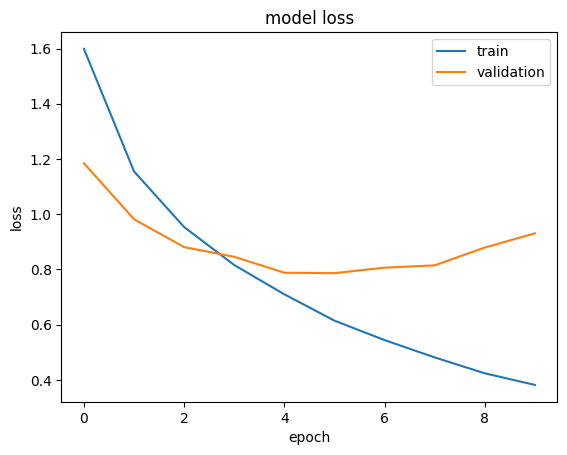

In [25]:
plotLosses(history)

In [26]:
def plotAccuracy(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


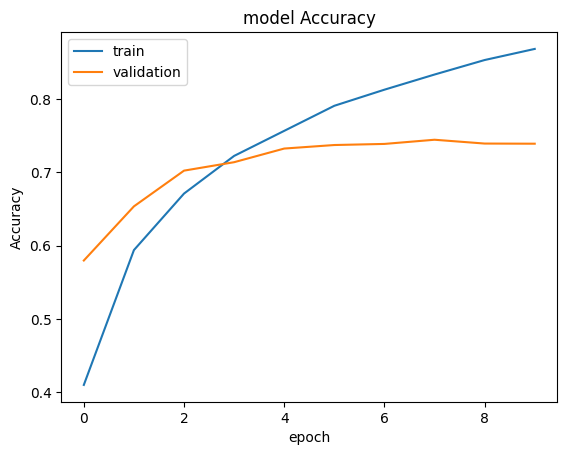

In [27]:
plotAccuracy(history)

In [ ]:
from keras.models import load_model
cnn.save('model111.h5')
# cnn.save('my_model.keras')

In [37]:
model = tf.keras.models.load_model('model111.h5')

In [54]:
import numpy as np
# Add a batch dimension to the input
x_test_sample = np.expand_dims(x_test[50], axis=0)

# Now pass it to the model for prediction
model.predict(x_test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

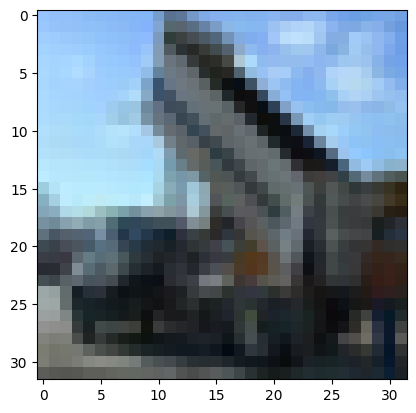

In [53]:
plt.imshow(x_test[50])

In [ ]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  

predictions = model.predict(x_test_sample)

predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The predicted class is: truck
